<a href="https://colab.research.google.com/github/smringdesigns/Telecom-X-Parte-2-Predicci-n-de-Cancelaci-n-Churn-/blob/main/Telecom_X_%E2%80%93_Parte_2_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ==============================
# 📌 Telecom X - Predicción de Churn
# ==============================

In [17]:
# 1. Importar librerías necesarias
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [18]:
# Leer la base de datos
df = pd.read_csv('/content/datos_tratados.csv')

In [19]:
df.head()

,customerID,Churn,Genero,AdultoMayor,TienePareja,TieneDependientes,MesesContrato,Telefono,VariasLineas,TipoInternet,...,SoporteTecnico,TV,Peliculas,TipoContrato,FacturaDigital,MetodoPago,CargosMensuales,CargosTotales,Cuentas_Diarias,Total_Servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,4
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,2
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,5
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7043 non-null   object 
 1   Churn                  7043 non-null   int64  
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   int64  
 4   TienePareja            7043 non-null   int64  
 5   TieneDependientes      7043 non-null   int64  
 6   MesesContrato          7043 non-null   int64  
 7   Telefono               7043 non-null   int64  
 8   VariasLineas           7043 non-null   int64  
 9   TipoInternet           7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   int64  
 11  RespaldoEnLinea        7043 non-null   int64  
 12  ProteccionDispositivo  7043 non-null   int64  
 13  SoporteTecnico         7043 non-null   int64  
 14  TV                     7043 non-null   int64  
 15  Peli

In [23]:
df.shape

(7043, 22)

In [21]:
# Eliminar columnas innecesarias
df = df.drop(columns=["customerID"])

In [29]:
# ===============================================
# 1. Identificar variables categóricas
# ===============================================
cat_cols = df.select_dtypes(include=["object"]).columns
print("Columnas categóricas detectadas:", cat_cols.tolist())

Columnas categóricas detectadas: ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPago']


In [30]:
# ===============================================
# 2. One-Hot Encoding
# drop_first=True evita la trampa de multicolinealidad
# (eliminar una categoría base de cada variable)
# ===============================================
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [31]:
# Vista previa
print("Dimensiones después de codificación:", df_encoded.shape)
df_encoded.head()

Dimensiones después de codificación: (7043, 26)


,Churn,AdultoMayor,TienePareja,TieneDependientes,MesesContrato,Telefono,VariasLineas,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,...,Cuentas_Diarias,Total_Servicios,Genero_Male,TipoInternet_Fiber optic,TipoInternet_No,TipoContrato_One year,TipoContrato_Two year,MetodoPago_Credit card (automatic),MetodoPago_Electronic check,MetodoPago_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,2.186667,4,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,1.996667,3,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,2.463333,2,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,3.266667,5,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,2.796667,3,False,True,False,False,False,False,False,True


In [34]:
# Revisar las columnas disponibles en el dataset
print("Columnas del dataset:", df_encoded.columns.tolist())

Columnas del dataset: ['Churn', 'AdultoMayor', 'TienePareja', 'TieneDependientes', 'MesesContrato', 'Telefono', 'VariasLineas', 'SeguridadEnLinea', 'RespaldoEnLinea', 'ProteccionDispositivo', 'SoporteTecnico', 'TV', 'Peliculas', 'FacturaDigital', 'CargosMensuales', 'CargosTotales', 'Cuentas_Diarias', 'Total_Servicios', 'Genero_Male', 'TipoInternet_Fiber optic', 'TipoInternet_No', 'TipoContrato_One year', 'TipoContrato_Two year', 'MetodoPago_Credit card (automatic)', 'MetodoPago_Electronic check', 'MetodoPago_Mailed check']


Distribución absoluta de la variable objetivo:
Churn
0    5174
1    1869
Name: count, dtype: int64

Distribución relativa (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


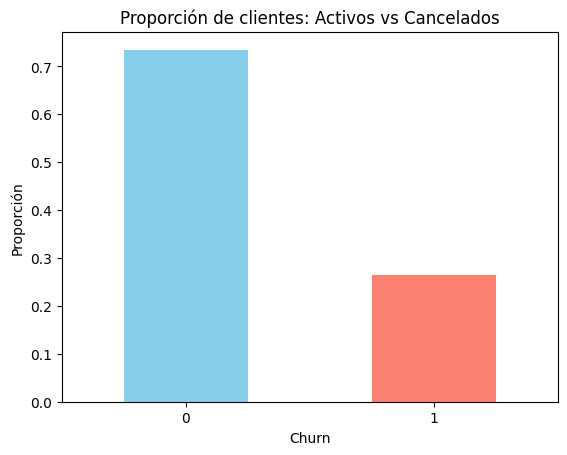

In [35]:
# ===============================================
# Distribución de la variable objetivo (Churn)
# ===============================================

print("Distribución absoluta de la variable objetivo:")
print(df_encoded["Churn"].value_counts())

print("\nDistribución relativa (%):")
print(df_encoded["Churn"].value_counts(normalize=True) * 100)

# ===============================================
# Visualización gráfica
# ===============================================
import matplotlib.pyplot as plt

df_encoded["Churn"].value_counts(normalize=True).plot(
    kind="bar",
    color=["skyblue", "salmon"],
    title="Proporción de clientes: Activos vs Cancelados"
)
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.show()

In [37]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Estado original
print("Distribución original:", Counter(y))

# Aplicar SMOTE (oversampling de la clase minoritaria)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Estado después de SMOTE
print("Distribución balanceada:", Counter(y_resampled))

Distribución original: Counter({0: 5174, 1: 1869})
Distribución balanceada: Counter({0: 5174, 1: 5174})


In [38]:
from sklearn.preprocessing import StandardScaler

# Variables predictoras (sin escalar)
X_raw = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Estandarización (para modelos basados en distancia)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

print("Dataset original:", X_raw.shape)
print("Dataset escalado:", X_scaled.shape)

Dataset original: (7043, 25)
Dataset escalado: (7043, 25)


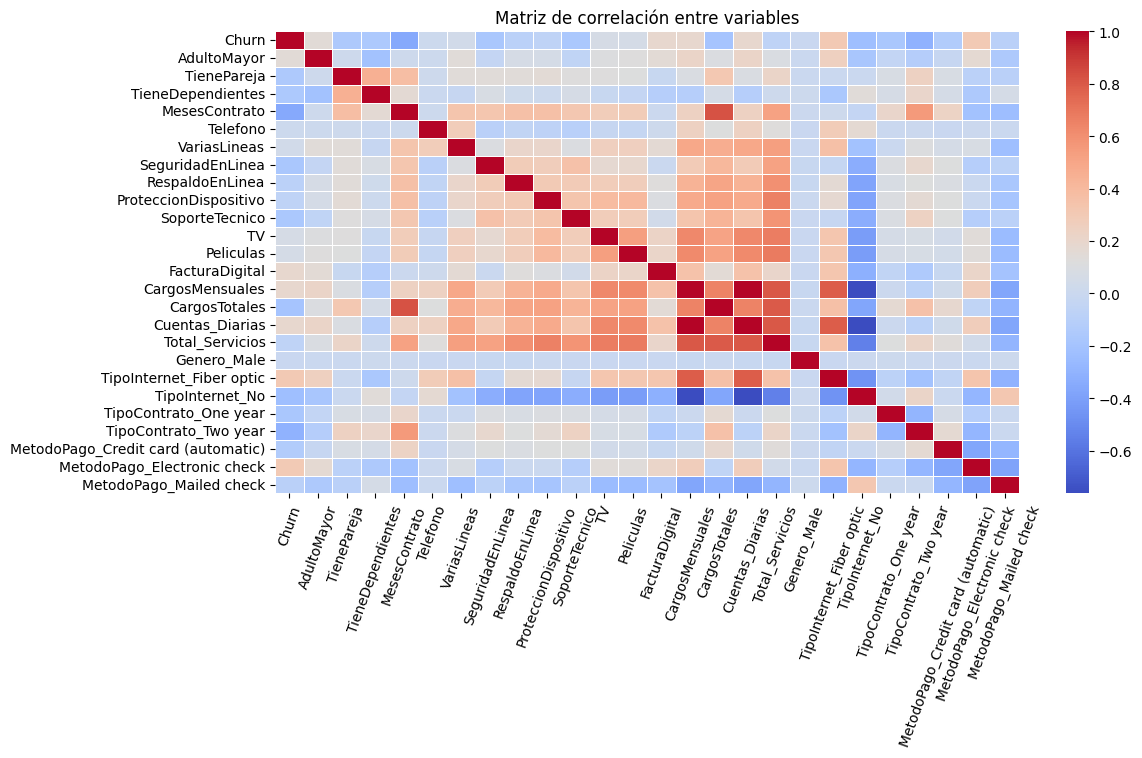

In [42]:
# ===============================================
# 1. Calcular la matriz de correlación
# ===============================================
corr_matrix = df_encoded.corr()

# ===============================================
# 2. Visualizar con mapa de calor
# ===============================================
plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,   # Si quieres mostrar valores, pon True (aunque puede ser cargado si hay muchas variables)
    linewidths=0.5
)

plt.title("Matriz de correlación entre variables")
plt.xticks(rotation=70)   # Rotar etiquetas del eje X 70°
plt.yticks(rotation=0)    # Mantener las etiquetas del eje Y horizontales
plt.show()

In [40]:
# Correlación de cada variable con 'Churn'
corr_with_target = corr_matrix["Churn"].sort_values(ascending=False)

print("Correlación de las variables con Churn:")
print(corr_with_target)

Correlación de las variables con Churn:
Churn                                 1.000000
TipoInternet_Fiber optic              0.308020
MetodoPago_Electronic check           0.301919
CargosMensuales                       0.193356
Cuentas_Diarias                       0.193356
FacturaDigital                        0.191825
AdultoMayor                           0.150889
TV                                    0.063228
Peliculas                             0.061382
VariasLineas                          0.040102
Telefono                              0.011942
Genero_Male                          -0.008612
ProteccionDispositivo                -0.066160
Total_Servicios                      -0.067264
RespaldoEnLinea                      -0.082255
MetodoPago_Mailed check              -0.091683
MetodoPago_Credit card (automatic)   -0.134302
TienePareja                          -0.150448
TieneDependientes                    -0.164221
SoporteTecnico                       -0.164674
SeguridadEnLinea    

/tmp/ipython-input-794865898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MesesContrato", data=df_encoded, palette="Set2")


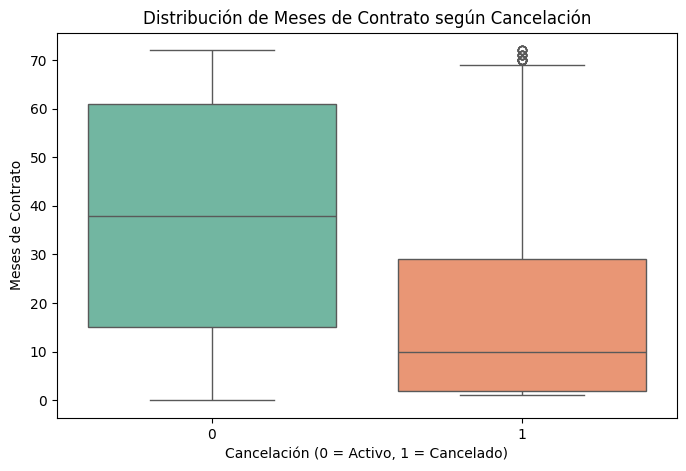

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="MesesContrato", data=df_encoded, palette="Set2")
plt.title("Distribución de Meses de Contrato según Cancelación")
plt.xlabel("Cancelación (0 = Activo, 1 = Cancelado)")
plt.ylabel("Meses de Contrato")
plt.show()

/tmp/ipython-input-1527689899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="CargosTotales", data=df_encoded, palette="Set1")


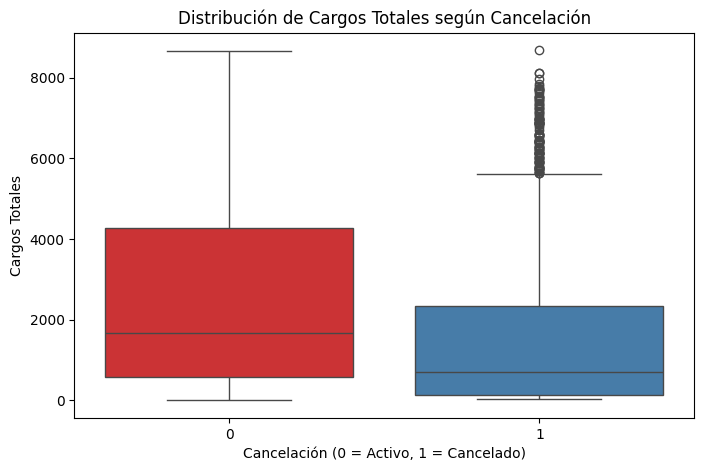

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="CargosTotales", data=df_encoded, palette="Set1")
plt.title("Distribución de Cargos Totales según Cancelación")
plt.xlabel("Cancelación (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cargos Totales")
plt.show()

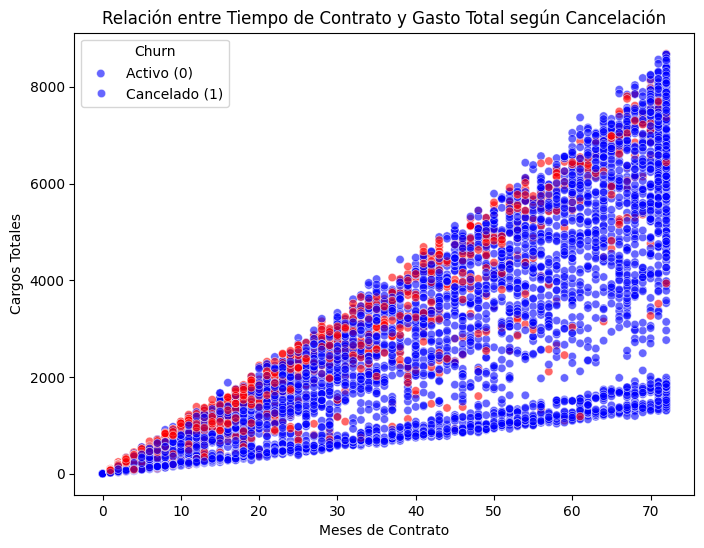

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="MesesContrato",
    y="CargosTotales",
    hue="Churn",
    data=df_encoded,
    alpha=0.6,
    palette={0: "blue", 1: "red"}
)
plt.title("Relación entre Tiempo de Contrato y Gasto Total según Cancelación")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargos Totales")
plt.legend(title="Churn", labels=["Activo (0)", "Cancelado (1)"])
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y objetivo (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# División 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% para prueba
    random_state=42,      # reproducibilidad
    stratify=y            # mantiene la misma proporción de Churn en train y test
)

print("Tamaño conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape, y_test.shape)

Tamaño conjunto de entrenamiento: (4930, 25) (4930,)
Tamaño conjunto de prueba: (2113, 25) (2113,)


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ===============================================
# 1. Preparar datos para modelos sensibles a escala
# ===============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===============================================
# 2. Modelo 1: Regresión Logística (requiere normalización)
# ===============================================
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print(" Resultados - Regresión Logística")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

# ===============================================
# 3. Modelo 2: Random Forest (NO requiere normalización)
# ===============================================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Resultados - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

 Resultados - Regresión Logística
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Accuracy: 0.7983909133932797

 Resultados - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1552
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

Accuracy: 0.7780407004259347



Resultados - Regresión Logística
Accuracy : 0.7983909133932797
Precision: 0.6415094339622641
Recall   : 0.5454545454545454
F1-score : 0.5895953757225434

Matriz de Confusión:


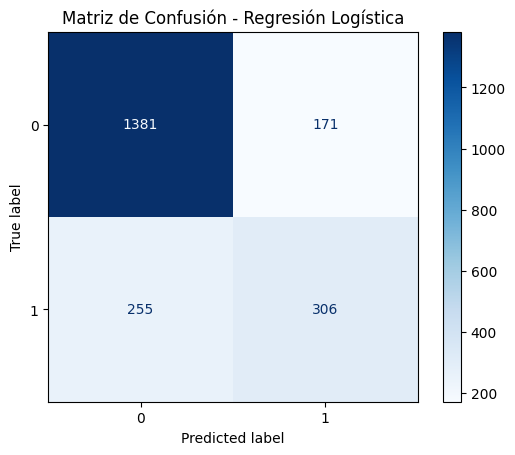


Resultados - Random Forest
Accuracy : 0.7780407004259347
Precision: 0.6013215859030837
Recall   : 0.48663101604278075
F1-score : 0.5379310344827586

Matriz de Confusión:


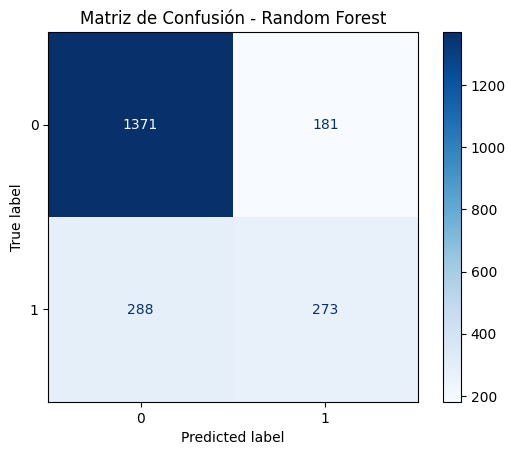

In [50]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# ===============================================
# 1. Función para evaluar modelos
# ===============================================
def evaluar_modelo(nombre, y_true, y_pred):
    print(f"\nResultados - {nombre}")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nMatriz de Confusión:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()

# ===============================================
# 2. Evaluar Regresión Logística
# ===============================================
evaluar_modelo("Regresión Logística", y_test, y_pred_log)

# ===============================================
# 3. Evaluar Random Forest
# ===============================================
evaluar_modelo("Random Forest", y_test, y_pred_rf)

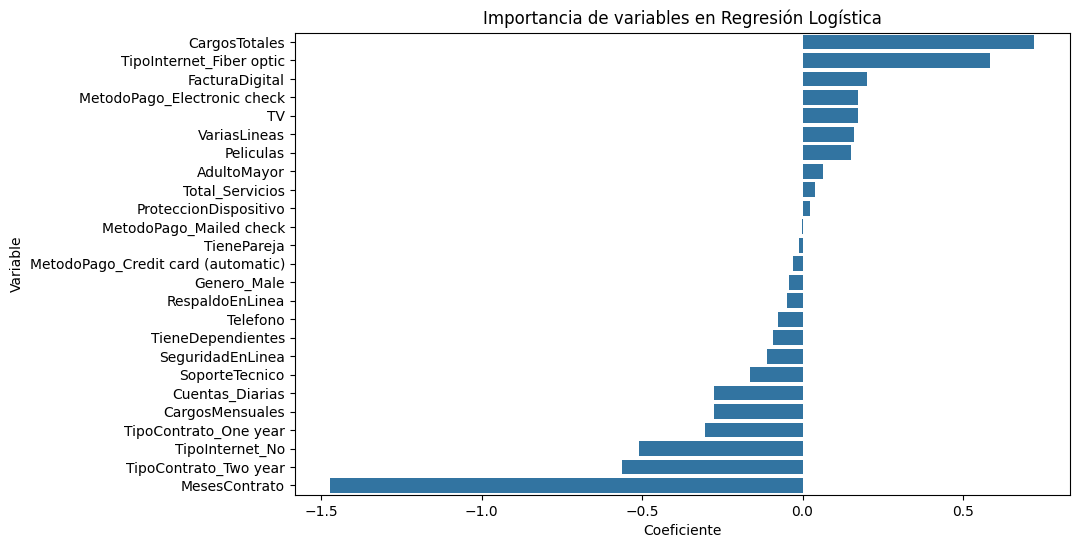

In [51]:
# Obtener coeficientes de la Regresión Logística
import numpy as np

coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": log_model.coef_[0]
}).sort_values(by="Coeficiente", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coeficientes)
plt.title("Importancia de variables en Regresión Logística")
plt.show()

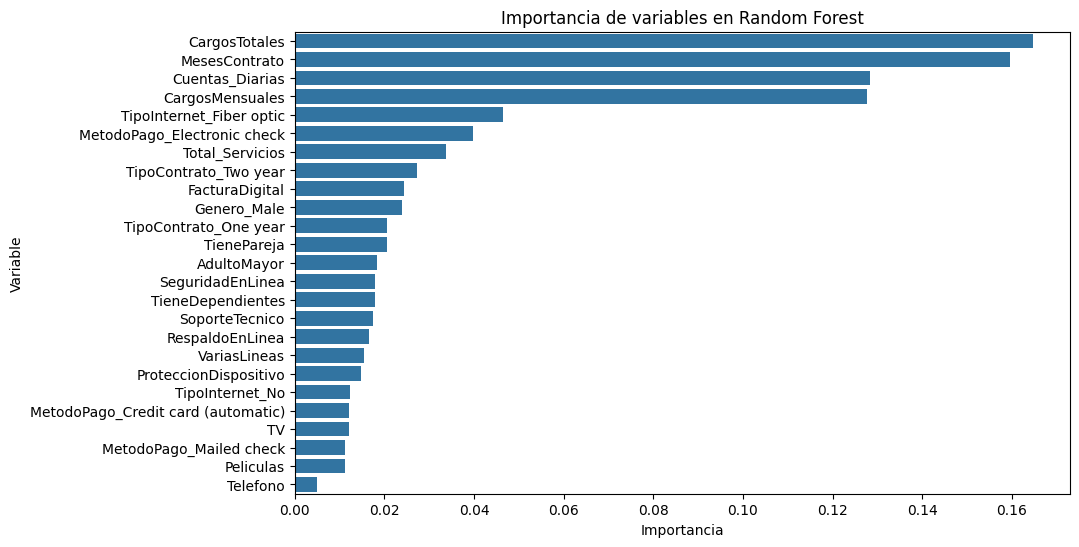

In [52]:
importancia_rf = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importancia_rf)
plt.title("Importancia de variables en Random Forest")
plt.show()

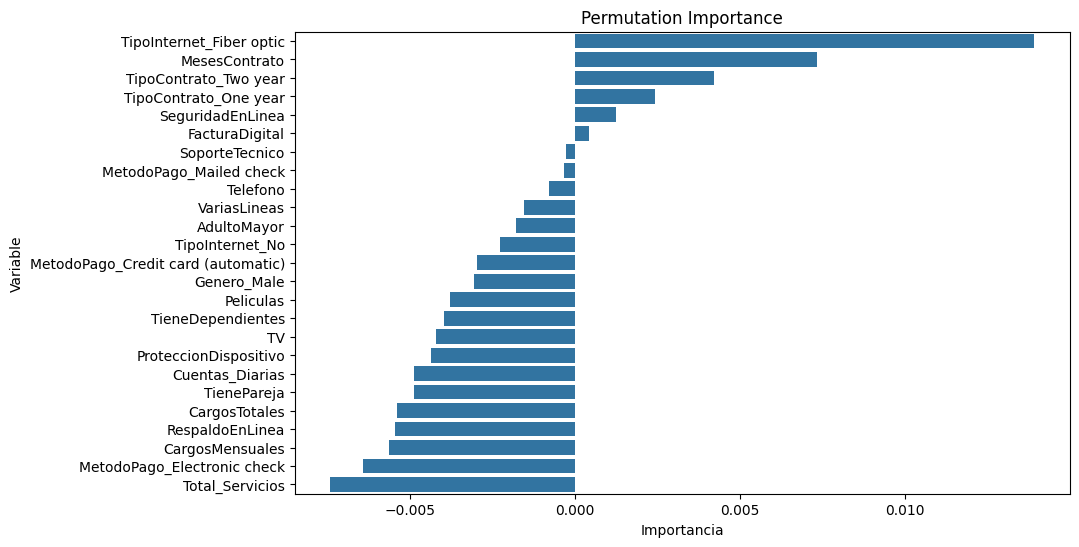

In [53]:
from sklearn.inspection import permutation_importance

# Ejemplo con Random Forest (pero se puede aplicar a KNN, SVM, etc.)
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

perm_importance = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": result.importances_mean
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=perm_importance)
plt.title("Permutation Importance")
plt.show()